# Superdense Coding

In [7]:
import qiskit as q
import numpy as np
import matplotlib as mpl

In [13]:
# preparation of the random message of be communicated
classical_bits = ['00', '01', '10', '11']

message = np.random.choice(classical_bits)

print(message)

10


In [14]:
# Preparation of iY gate to be used. Note that iY gate is simply X-Z gate. 
# But it's a good exercise to learn how any unitary matrix is converted to a quantum gate.
Y = np.array([
    [0, -1j],
    [1j, 0]
])

iY = 1j * Y

iY_op = q.quantum_info.Operator(iY)
print(iY_op)

Operator([[ 0.+0.j,  1.-0.j],
          [-1.+0.j,  0.+0.j]],
         input_dims=(2,), output_dims=(2,))


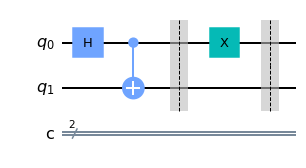

In [15]:
qc = q.QuantumCircuit(2, 2)

# Preparation of entangled qubits to be shared by Alice and Bob
qc.h(0)
qc.cx(0, 1)
qc.barrier()

# Alice performs operations depending upon the message to be communicated
if message == '01':
    qc.z(0)
    qc.barrier()
    
elif message == '10':
    qc.x(0)
    qc.barrier()
    
elif message == '11':
    qc.unitary(iY_op, [0], label='iY')
    qc.barrier()
    
qc.draw(output='mpl')

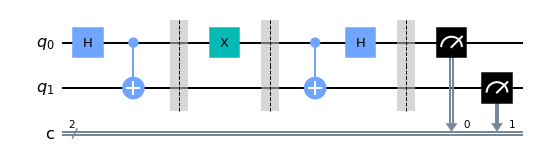

In [16]:
# Alice send her qubit to Bob
# Bob performs operations on the entangled pair
qc.cx(0, 1)
qc.h(0)
qc.barrier()

# Bob measures the qubits to get the message
qc.measure([0, 1], [0, 1])
qc.draw(output='mpl')

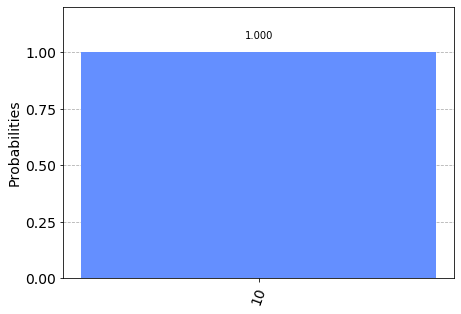

In [17]:
# execute the circuit on a qasm simulator
backend = q.Aer.get_backend('qasm_simulator')
job = q.execute(qc, backend)
result = job.result()
counts = result.get_counts()

graph = q.visualization.plot_histogram(counts)
display(graph)

# The probability of getting the message = 1